In [2]:
import sys
 
# setting path
sys.path.append('../../')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from src.models.dataset import MultiTSDataset

In [4]:
DS_PATH = "data/processed/gee_ds_20231003_formatted_v1"

In [5]:
df = pd.read_csv('../../data/processed/gee_ds_20231003_2022_test/mapped_paths.csv')
df.head()

,no2_path,features_path,date,ds_type
0,../../data/processed/gee_ds_20231003_2022_test...,../../data/processed/gee_ds_20231003_2022_test...,2021-11-14,val
1,../../data/processed/gee_ds_20231003_2022_test...,../../data/processed/gee_ds_20231003_2022_test...,2019-01-28,train
2,../../data/processed/gee_ds_20231003_2022_test...,../../data/processed/gee_ds_20231003_2022_test...,2023-04-13,others
3,../../data/processed/gee_ds_20231003_2022_test...,../../data/processed/gee_ds_20231003_2022_test...,2019-02-01,train
4,../../data/processed/gee_ds_20231003_2022_test...,../../data/processed/gee_ds_20231003_2022_test...,2019-02-05,train


In [6]:
df_train = df[df['ds_type'] == 'train']

In [7]:
ds = MultiTSDataset(df_train)

In [8]:
x_data = []
target_data = []
for x, y in ds:
    x_data.append(x.flatten().tolist())
    target_data.append(y.flatten().tolist())

features = np.array(x_data)
target = np.array(target_data).flatten()

In [9]:
features.shape, target.shape

((4759, 2920), (4759,))

In [10]:
PCA_RANGES = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

pcas_data = []

for pca_num in PCA_RANGES:
    pca = PCA(n_components=pca_num)
    pca.fit(features)
    pca_shape = pca.components_.shape
    explained_var_ratio = pca.explained_variance_ratio_.sum()
    print(f'Fininhed to fit {pca_num}-PCA, Var: {explained_var_ratio:.4f}, Shape: {pca_shape}')
    pcas_data.append((pca_num, explained_var_ratio))

Fininhed to fit 200-PCA, Var: 0.7735, Shape: (200, 2920)
Fininhed to fit 250-PCA, Var: 0.8017, Shape: (250, 2920)
Fininhed to fit 300-PCA, Var: 0.8236, Shape: (300, 2920)
Fininhed to fit 350-PCA, Var: 0.8433, Shape: (350, 2920)
Fininhed to fit 400-PCA, Var: 0.8605, Shape: (400, 2920)
Fininhed to fit 450-PCA, Var: 0.8755, Shape: (450, 2920)
Fininhed to fit 500-PCA, Var: 0.8888, Shape: (500, 2920)
Fininhed to fit 550-PCA, Var: 0.9008, Shape: (550, 2920)
Fininhed to fit 600-PCA, Var: 0.9115, Shape: (600, 2920)
Fininhed to fit 650-PCA, Var: 0.9212, Shape: (650, 2920)
Fininhed to fit 700-PCA, Var: 0.9299, Shape: (700, 2920)
Fininhed to fit 750-PCA, Var: 0.9378, Shape: (750, 2920)
Fininhed to fit 800-PCA, Var: 0.9449, Shape: (800, 2920)


In [11]:
df = pd.DataFrame(pcas_data, columns=['n_components', 'explained_variance_ratio'])
df.head()

,n_components,explained_variance_ratio
0,200,0.773460
1,250,0.801699
2,300,0.823597
3,350,0.843281
4,400,0.860454


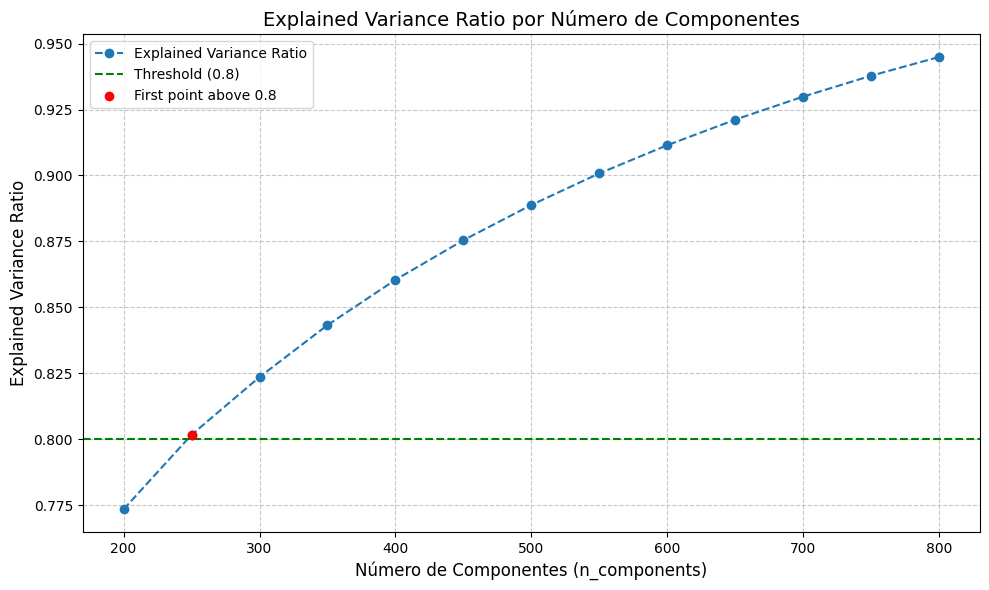

In [12]:
# Limite para destacar o primeiro ponto acima de 0.9
threshold = 0.80

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))

# Linha tracejada
plt.plot(df['n_components'], df['explained_variance_ratio'], linestyle='--', marker='o', label='Explained Variance Ratio')

# Adicionando a linha de threshold
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold ({threshold})')

# Destacando o primeiro ponto acima do threshold
above_threshold = df[df['explained_variance_ratio'] > threshold].iloc[0]
plt.scatter(above_threshold['n_components'], above_threshold['explained_variance_ratio'], color='red', label=f'First point above {threshold}', zorder=5)

# Adicionando rótulos e título
plt.xlabel('Número de Componentes (n_components)', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio por Número de Componentes', fontsize=14)

# Adicionando grid
plt.grid(linestyle='--', alpha=0.7)

# Adicionando legenda
plt.legend()

# Estilizando os ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.savefig('pca_plot.pdf', bbox_inches='tight')
plt.show()

In [13]:
pca = PCA(n_components=550)
pca.fit(features)

PCA(n_components=550)

In [14]:
pca_shape = pca.components_.shape
explained_var_ratio = pca.explained_variance_ratio_.sum()
print(f'Fininhed to fit 550-PCA, Var: {explained_var_ratio:.4f}, Shape: {pca_shape}')

Fininhed to fit 550-PCA, Var: 0.9008, Shape: (550, 2920)


In [15]:
import pathlib as pl
from joblib import dump

ARTIFACTS_PATH = '../../artifacts/121023_2022_test'
pl.Path(ARTIFACTS_PATH).mkdir(parents=True, exist_ok=True)
dump(pca, f'{ARTIFACTS_PATH}/pca_550_components.joblib')

['../../artifacts/121023_2022_test/pca_550_components.joblib']